In [1]:
# importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
#reading datasets
batting = pd.read_csv("../Data/ipl_batting.csv")
batsmen= pd.read_csv("../Data/Batsman_info.csv")


In [3]:
matches = pd.read_csv("../Data/ipl_matches.csv")

In [4]:
deliveries = pd.read_csv("../Data/ipl_deliveries.csv")

In [5]:
matches.head()

,match_date,Ground,Team 1,Team 2,Winner,year,month,day,win_mode,margin,toss_winner,toss_decision,match_no
0,2008-04-18,"Bengaluru, Bangalore",Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,2008,4,18,Runs,140.0,Royal Challengers Bangalore,field first,1
1,2008-04-19,"Mohali, Chandigarh",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,2008,4,19,Runs,33.0,Chennai Super Kings,bat first,2
2,2008-04-19,Delhi,Delhi Capitals,Rajasthan Royals,Delhi Capitals,2008,4,19,Wickets,9.0,Rajasthan Royals,bat first,3
3,2008-04-20,Kolkata,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,2008,4,20,Wickets,5.0,Deccan Chargers,bat first,4
4,2008-04-20,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,2008,4,20,Wickets,5.0,Mumbai Indians,bat first,5


In [6]:
batting.head()

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,dismissal_mode,bowler_name,fielder,is_fielder_involved,match_date
0,1,Mumbai Indians,Chennai Super Kings,ST Jayasuriya,c Hayden b Thushara,26.0,20.0,0.0,5.0,0.0,130.00,normal player,caught,Thushara,Hayden,1,2009-04-18
1,1,Mumbai Indians,Chennai Super Kings,SR Tendulkar,not out,59.0,49.0,0.0,7.0,0.0,120.40,captain,not out,no bowler,no fielder,0,2009-04-18
2,1,Mumbai Indians,Chennai Super Kings,S Dhawan,c Dhoni b Gony,22.0,21.0,0.0,2.0,0.0,104.76,normal player,caught,Gony,Dhoni,1,2009-04-18
3,1,Mumbai Indians,Chennai Super Kings,JP Duminy,c & b Gony,9.0,7.0,0.0,1.0,0.0,128.57,normal player,caught,Gony,Gony,1,2009-04-18
4,1,Mumbai Indians,Chennai Super Kings,DJ Bravo,c Hayden b Joginder Sharma,5.0,4.0,0.0,1.0,0.0,125.00,normal player,caught,Joginder Sharma,Hayden,1,2009-04-18


### **Question 1**
Write **Python** code for the following
* Read the **ipl_matches.csv** dataset
* Display **data-type** of each column
* Define **granularity** for the dataset **ipl_matches**
* Write code to create a **primary key** as a **new column** for the dataset 
  * Convert match_date into the format **YYYYMMDD**
  * Depending upon whether the given match is the **1st** of **2nd** for the day, append a string **01 or 02** to the end
  * **Ex.** if 2 matches took place on 18-04-2009 then the primary key of the 1st match should look like **2009041801** and second match as **2009041802**
--------------------

In [7]:
matches.dtypes

match_date        object
Ground            object
Team 1            object
Team 2            object
Winner            object
year               int64
month              int64
day                int64
win_mode          object
margin           float64
toss_winner       object
toss_decision     object
match_no           int64
dtype: object

In [8]:
# granuality- match date, team1 , team 2 , ground & winner

In [9]:
date=matches.match_date
key=[]
visited=[]
for i in date:
     if i in visited:
         number= visited.count(i)
         temp=i.split('-')
         temp1=temp[0]+temp[1]+temp[2]+'0'+str(number+1)
         visited.append(i)
         key.append(temp1)
     else:
         temp=i.split('-')
         temp1=temp[0]+temp[1]+temp[2]+'01'
         key.append(temp1)
         visited.append(i)

In [10]:
matches['match_key']=key

In [11]:
matches.head()

,match_date,Ground,Team 1,Team 2,Winner,year,month,day,win_mode,margin,toss_winner,toss_decision,match_no,match_key
0,2008-04-18,"Bengaluru, Bangalore",Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,2008,4,18,Runs,140.0,Royal Challengers Bangalore,field first,1,2008041801
1,2008-04-19,"Mohali, Chandigarh",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,2008,4,19,Runs,33.0,Chennai Super Kings,bat first,2,2008041901
2,2008-04-19,Delhi,Delhi Capitals,Rajasthan Royals,Delhi Capitals,2008,4,19,Wickets,9.0,Rajasthan Royals,bat first,3,2008041902
3,2008-04-20,Kolkata,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,2008,4,20,Wickets,5.0,Deccan Chargers,bat first,4,2008042001
4,2008-04-20,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,2008,4,20,Wickets,5.0,Mumbai Indians,bat first,5,2008042002


### **Question 2** 
Let's look at the below statement : <br>
**It is said that you win half the match if you win the toss** <br><br>
So, let's understand to what extent teams who **won the toss** also **won the matches**
  * Write code to find out **% matches by team** (across all seasons) where they **won the toss**
  * What **% of matches** which the teams **won the toss also ended up winning the matches**?
  * Exhibit the above as a **% of total matches**
  * Which team tops the chart? Meaning which team took full advantage of the opportunity of winning the toss

**Ex :** If CSK played a total of **100** matches and won toss in **70** of them. This would mean **70%** of tosses were won by them. Now, if out of these 70 they ended up winning **28** of them then they won **40%** of the matches where they had won the toss. This is **28%** of total matches

In [12]:
matches.head()

,match_date,Ground,Team 1,Team 2,Winner,year,month,day,win_mode,margin,toss_winner,toss_decision,match_no,match_key
0,2008-04-18,"Bengaluru, Bangalore",Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,2008,4,18,Runs,140.0,Royal Challengers Bangalore,field first,1,2008041801
1,2008-04-19,"Mohali, Chandigarh",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,2008,4,19,Runs,33.0,Chennai Super Kings,bat first,2,2008041901
2,2008-04-19,Delhi,Delhi Capitals,Rajasthan Royals,Delhi Capitals,2008,4,19,Wickets,9.0,Rajasthan Royals,bat first,3,2008041902
3,2008-04-20,Kolkata,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,2008,4,20,Wickets,5.0,Deccan Chargers,bat first,4,2008042001
4,2008-04-20,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,2008,4,20,Wickets,5.0,Mumbai Indians,bat first,5,2008042002


In [13]:
matches['Team 1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals',
       'Deccan Chargers', 'Chennai Super Kings', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Sunrisers Hyderabad', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [14]:
matches['Team 2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Royal Challengers Bangalore',
       'Kings XI Punjab', 'Delhi Capitals', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Gujarat Lions'], dtype=object)

In [15]:
matches['toss_winner'].unique()

array(['Royal Challengers Bangalore', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Mumbai Indians',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Delhi Capitals',
       'no toss', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Sunrisers Hyderabad', 'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant'], dtype=object)

In [16]:
matches['toss_winner'].replace(to_replace='Rising Pune Supergiants',
                               value='Rising Pune Supergiant',inplace=True)

/var/folders/dz/g_qfrr755p93l5y4b9733dwh0000gq/T/ipykernel_6602/3050125185.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['toss_winner'].replace(to_replace='Rising Pune Supergiants',


In [17]:
matches['toss_winner'].unique()

array(['Royal Challengers Bangalore', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Mumbai Indians',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Delhi Capitals',
       'no toss', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Sunrisers Hyderabad', 'Gujarat Lions', 'Rising Pune Supergiant'],
      dtype=object)

In [18]:
team_1=matches['Team 1'].groupby(matches['Team 1']).agg('count')

In [19]:
team_1

Team 1
Chennai Super Kings             91
Deccan Chargers                 39
Delhi Capitals                  92
Gujarat Lions                   16
Kings XI Punjab                 87
Kochi Tuskers Kerala             7
Kolkata Knight Riders           87
Mumbai Indians                  87
Pune Warriors                   23
Rajasthan Royals                66
Rising Pune Supergiant          14
Royal Challengers Bangalore    101
Sunrisers Hyderabad             53
Name: Team 1, dtype: int64

In [20]:
team_2=matches['Team 2'].groupby(matches['Team 2']).agg('count')

In [21]:
team_2

Team 2
Chennai Super Kings             75
Deccan Chargers                 37
Delhi Capitals                  86
Gujarat Lions                   14
Kings XI Punjab                 88
Kochi Tuskers Kerala             7
Kolkata Knight Riders           94
Mumbai Indians                 101
Pune Warriors                   23
Rajasthan Royals                84
Rising Pune Supergiant          16
Royal Challengers Bangalore     82
Sunrisers Hyderabad             56
Name: Team 2, dtype: int64

In [22]:
total_matches= team_1+team_2

In [23]:
total_matches

Team 1
Chennai Super Kings            166
Deccan Chargers                 76
Delhi Capitals                 178
Gujarat Lions                   30
Kings XI Punjab                175
Kochi Tuskers Kerala            14
Kolkata Knight Riders          181
Mumbai Indians                 188
Pune Warriors                   46
Rajasthan Royals               150
Rising Pune Supergiant          30
Royal Challengers Bangalore    183
Sunrisers Hyderabad            109
dtype: int64

In [24]:
toss_winner=matches['toss_winner'].groupby(matches['toss_winner']).agg('count')

In [25]:
toss_winner

toss_winner
Chennai Super Kings            89
Deccan Chargers                43
Delhi Capitals                 90
Gujarat Lions                  15
Kings XI Punjab                80
Kochi Tuskers Kerala            8
Kolkata Knight Riders          92
Mumbai Indians                 98
Pune Warriors                  20
Rajasthan Royals               80
Rising Pune Supergiant         13
Royal Challengers Bangalore    82
Sunrisers Hyderabad            46
no toss                         7
Name: toss_winner, dtype: int64

In [26]:
percentage_winning_toss=(toss_winner/total_matches)*100

In [27]:
percentage_winning_toss

Chennai Super Kings            53.614458
Deccan Chargers                56.578947
Delhi Capitals                 50.561798
Gujarat Lions                  50.000000
Kings XI Punjab                45.714286
Kochi Tuskers Kerala           57.142857
Kolkata Knight Riders          50.828729
Mumbai Indians                 52.127660
Pune Warriors                  43.478261
Rajasthan Royals               53.333333
Rising Pune Supergiant         43.333333
Royal Challengers Bangalore    44.808743
Sunrisers Hyderabad            42.201835
no toss                              NaN
dtype: float64

In [28]:
match_winner=matches['Winner'].groupby(matches['Winner']).agg('count')

In [29]:
match_winner

Winner
Chennai Super Kings            100
Deccan Chargers                 29
Delhi Capitals                  76
Gujarat Lions                   13
Kings XI Punjab                 80
Kochi Tuskers Kerala             6
Kolkata Knight Riders           91
Match                            2
Mumbai Indians                 107
Pune Warriors                   12
Rajasthan Royals                73
Rising Pune Supergiant          15
Royal Challengers Bangalore     83
Sunrisers Hyderabad             57
abandoned                        6
no result                        5
tied                             8
Name: Winner, dtype: int64

In [30]:
toss_match_winner=matches['Team 1'].groupby([matches['Winner'],
                                             matches['toss_winner']]).agg('count')

In [31]:
#toss match winner


In [32]:
temp=toss_match_winner.reset_index()
temp

,Winner,toss_winner,Team 1
0,Chennai Super Kings,Chennai Super Kings,57
1,Chennai Super Kings,Deccan Chargers,2
2,Chennai Super Kings,Delhi Capitals,7
3,Chennai Super Kings,Kings XI Punjab,3
4,Chennai Super Kings,Kolkata Knight Riders,6
...,...,...,...
120,tied,Kings XI Punjab,1
121,tied,Kolkata Knight Riders,1
122,tied,Mumbai Indians,1
123,tied,Rajasthan Royals,1


In [33]:
df=temp.loc[temp['Winner']==temp['toss_winner']]
df

,Winner,toss_winner,Team 1
0,Chennai Super Kings,Chennai Super Kings,57
11,Deccan Chargers,Deccan Chargers,19
19,Delhi Capitals,Delhi Capitals,41
29,Gujarat Lions,Gujarat Lions,10
36,Kings XI Punjab,Kings XI Punjab,34
44,Kochi Tuskers Kerala,Kochi Tuskers Kerala,4
50,Kolkata Knight Riders,Kolkata Knight Riders,53
63,Mumbai Indians,Mumbai Indians,55
75,Pune Warriors,Pune Warriors,3
84,Rajasthan Royals,Rajasthan Royals,41


In [34]:
dif=toss_winner.to_numpy()
#print(toss_winner)
dif=np.delete(dif,13)
print(dif)

[89 43 90 15 80  8 92 98 20 80 13 82 46]


In [35]:
df['Team']=dif

/var/folders/dz/g_qfrr755p93l5y4b9733dwh0000gq/T/ipykernel_6602/4217512933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Team']=dif


In [36]:
df= df.drop(columns=['Winner'])

In [37]:
df.columns=['Team','Win+Toss','Toss']

In [38]:
#print(percentage_winning_toss)
tem= percentage_winning_toss.to_numpy()


In [39]:
df['%(win+toss)']=(df['Win+Toss']/df['Toss'])* 100

In [40]:
tem=percentage_winning_toss.to_numpy()
toss=np.delete(tem,13)

In [41]:
tem=percentage_winning_toss.to_numpy()
toss=np.delete(tem,13)

In [42]:
df['%toss']= toss

In [43]:
df['total_matches']=total_matches.to_numpy()

In [44]:
df['%(win+toss)/total']=(df['Win+Toss']/df['total_matches'])*100

In [45]:
df.head()

,Team,Win+Toss,Toss,%(win+toss),%toss,total_matches,%(win+toss)/total
0,Chennai Super Kings,57,89,64.044944,53.614458,166,34.337349
11,Deccan Chargers,19,43,44.186047,56.578947,76,25.000000
19,Delhi Capitals,41,90,45.555556,50.561798,178,23.033708
29,Gujarat Lions,10,15,66.666667,50.000000,30,33.333333
36,Kings XI Punjab,34,80,42.500000,45.714286,175,19.428571


/var/folders/dz/g_qfrr755p93l5y4b9733dwh0000gq/T/ipykernel_6602/3846551971.py:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax = sns.barplot(x=df['Team'], y=df['Win+Toss']).set_xticklabels(df['Team'], rotation=90)


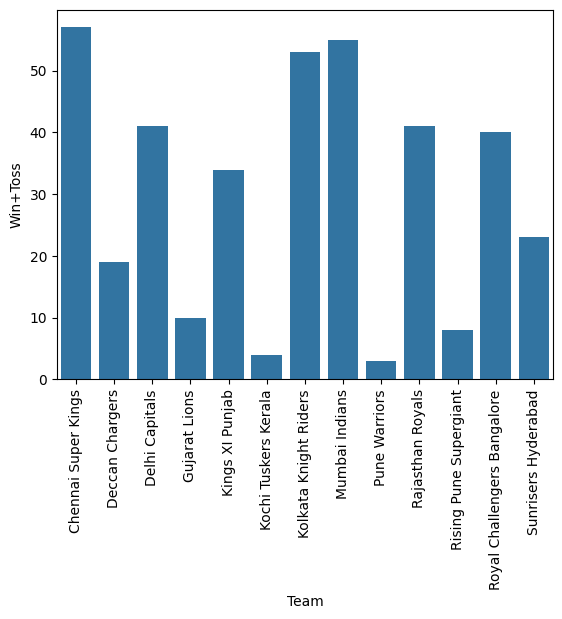

In [46]:
ax = sns.barplot(x=df['Team'], y=df['Win+Toss']).set_xticklabels(df['Team'], rotation=90)

/var/folders/dz/g_qfrr755p93l5y4b9733dwh0000gq/T/ipykernel_6602/4207542245.py:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax = sns.barplot(x=df['Team'], y=df['%(win+toss)/total']).set_xticklabels(df['Team'], rotation=90)


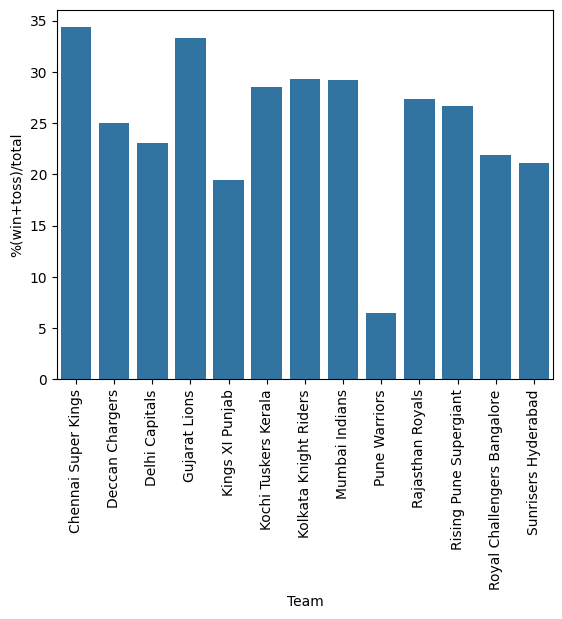

In [47]:
ax = sns.barplot(x=df['Team'], y=df['%(win+toss)/total']).set_xticklabels(df['Team'], rotation=90)

### **Question 3** 
* List the names of the **top 10 batsmen** by total runs accumulated across all the seasons
  * The output should be stored in a list

--------------------------



In [48]:
bastsmen= batting['R'].groupby(batting['batsmen']).sum()

In [49]:
batsman=batsmen.reset_index()

In [50]:
batsman.sort_values(['R'], axis=0, ascending=False, inplace=True)

In [51]:
batsman.head(10)

,index,Unnamed: 0,batsmen,R,B,M,fours,sixes,SR,boundary_contribution,100s,50s,times_played,average
487,487,487,V Kohli,5412.0,4112.0,4225.0,480.0,190.0,20030.77,18.559622,5.0,36.0,169,32.023669
424,424,424,SK Raina,5368.0,3915.0,3645.0,493.0,194.0,22585.81,20.137846,1.0,38.0,189,28.402116
366,366,366,RG Sharma,4898.0,3744.0,3665.0,431.0,194.0,20495.90,18.349718,1.0,36.0,183,26.765027
113,113,113,DA Warner,4706.0,3305.0,3929.0,458.0,181.0,15653.18,15.215273,4.0,44.0,126,37.349206
393,393,393,S Dhawan,4579.0,3669.0,3987.0,524.0,96.0,17638.07,19.483546,0.0,37.0,158,28.981013
95,95,95,CH Gayle,4484.0,2969.0,3394.0,368.0,326.0,16177.00,17.690974,6.0,29.0,124,36.161290
292,292,292,MS Dhoni,4432.0,3215.0,3009.0,297.0,209.0,21878.36,15.492492,0.0,23.0,170,26.070588
385,385,385,RV Uthappa,4411.0,3380.0,3423.0,435.0,156.0,20213.99,19.642338,0.0,24.0,170,25.947059
24,24,24,AB de Villiers,4395.0,2906.0,2867.0,357.0,212.0,18819.50,14.892853,3.0,33.0,142,30.950704
150,150,150,G Gambhir,4217.0,3404.0,3449.0,492.0,59.0,16124.74,16.656673,0.0,36.0,153,27.562092


### **Question 4**
* Visualize the **runs made vs balls faced** in a jointplot. You should do this for all batsmen who batted in the **IPL season 2017**

--------------------

In [52]:
print(batting)
df = batting
dt = df.match_date
col = list()
for i in dt:
    i = str(i)
    temp = i.split('-')
    col.append(temp[0])
df['year'] = col

        match_no               team_1               team_2        batsmen  \
0              1       Mumbai Indians  Chennai Super Kings  ST Jayasuriya   
1              1       Mumbai Indians  Chennai Super Kings   SR Tendulkar   
2              1       Mumbai Indians  Chennai Super Kings       S Dhawan   
3              1       Mumbai Indians  Chennai Super Kings      JP Duminy   
4              1       Mumbai Indians  Chennai Super Kings       DJ Bravo   
...          ...                  ...                  ...            ...   
11541  Final (N)  Chennai Super Kings     Rajasthan Royals      YK Pathan   
11542  Final (N)  Chennai Super Kings     Rajasthan Royals         M Kaif   
11543  Final (N)  Chennai Super Kings     Rajasthan Royals      RA Jadeja   
11544  Final (N)  Chennai Super Kings     Rajasthan Royals       SK Warne   
11545  Final (N)  Chennai Super Kings     Rajasthan Royals  Sohail Tanvir   

                    wicket_status     R     B    M  fours  sixes      SR  \

In [53]:
df.head()

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,dismissal_mode,bowler_name,fielder,is_fielder_involved,match_date,year
0,1,Mumbai Indians,Chennai Super Kings,ST Jayasuriya,c Hayden b Thushara,26.0,20.0,0.0,5.0,0.0,130.00,normal player,caught,Thushara,Hayden,1,2009-04-18,2009
1,1,Mumbai Indians,Chennai Super Kings,SR Tendulkar,not out,59.0,49.0,0.0,7.0,0.0,120.40,captain,not out,no bowler,no fielder,0,2009-04-18,2009
2,1,Mumbai Indians,Chennai Super Kings,S Dhawan,c Dhoni b Gony,22.0,21.0,0.0,2.0,0.0,104.76,normal player,caught,Gony,Dhoni,1,2009-04-18,2009
3,1,Mumbai Indians,Chennai Super Kings,JP Duminy,c & b Gony,9.0,7.0,0.0,1.0,0.0,128.57,normal player,caught,Gony,Gony,1,2009-04-18,2009
4,1,Mumbai Indians,Chennai Super Kings,DJ Bravo,c Hayden b Joginder Sharma,5.0,4.0,0.0,1.0,0.0,125.00,normal player,caught,Joginder Sharma,Hayden,1,2009-04-18,2009


In [54]:
df = df[df['year']=='2017']
df.head()

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,dismissal_mode,bowler_name,fielder,is_fielder_involved,match_date,year
6962,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,c Mandeep Singh b Choudhary,14.0,8.0,10.0,2.0,1.0,175.00,captain,caught,Choudhary,Mandeep Singh,1,2017-04-05,2017
6963,1,Sunrisers Hyderabad,Royal Challengers Bangalore,S Dhawan,c Sachin Baby b Binny,40.0,31.0,51.0,5.0,0.0,129.03,normal player,caught,Binny,Sachin Baby,1,2017-04-05,2017
6964,1,Sunrisers Hyderabad,Royal Challengers Bangalore,MC Henriques,c Sachin Baby b Chahal,52.0,37.0,67.0,3.0,2.0,140.54,normal player,caught,Chahal,Sachin Baby,1,2017-04-05,2017
6965,1,Sunrisers Hyderabad,Royal Challengers Bangalore,Yuvraj Singh,b Mills,62.0,27.0,49.0,7.0,3.0,229.62,normal player,bowled,Mills,no fielder,0,2017-04-05,2017
6966,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DJ Hooda,not out,16.0,12.0,29.0,0.0,1.0,133.33,normal player,not out,no bowler,no fielder,0,2017-04-05,2017


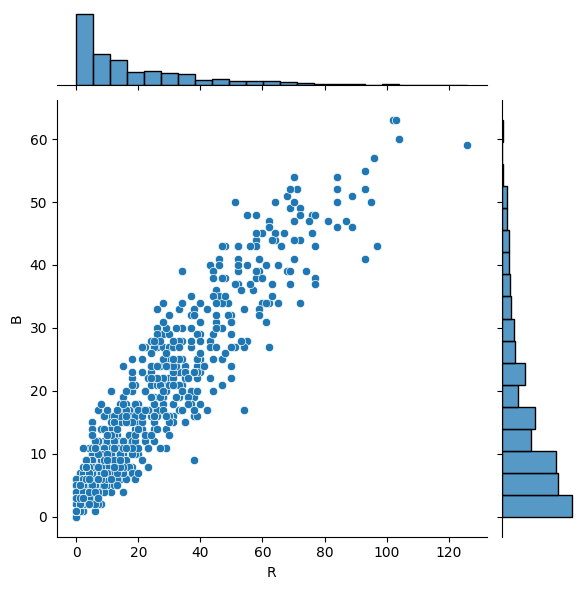

In [55]:
sns.jointplot(x='R',y='B',data=df)

### **Question 5**
* Create a new calculated column called **boundary_contribution**. It is calculated as : **(total runs made in 4s + 6s)/(total runs scored)**
* Create a scatter-plot between **boundary_contribution** and **strike_rate** where each dot represents an innings by a batsman
* Aggregate **boundary_contribution** by player and list down **top 10** players by boundary_contribution across all seasons
---------------------------------


In [58]:
batting['boundary_contribution']=(batting['fours']+batting['sixes'])/batting['R']

In [67]:
batting.head(100)

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,dismissal_mode,bowler_name,fielder,is_fielder_involved,match_date,boundary_contribution
0,1,Mumbai Indians,Chennai Super Kings,ST Jayasuriya,c Hayden b Thushara,26.0,20.0,0.0,5.0,0.0,130.00,normal player,caught,Thushara,Hayden,1,2009-04-18,0.192308
1,1,Mumbai Indians,Chennai Super Kings,SR Tendulkar,not out,59.0,49.0,0.0,7.0,0.0,120.40,captain,not out,no bowler,no fielder,0,2009-04-18,0.118644
2,1,Mumbai Indians,Chennai Super Kings,S Dhawan,c Dhoni b Gony,22.0,21.0,0.0,2.0,0.0,104.76,normal player,caught,Gony,Dhoni,1,2009-04-18,0.090909
3,1,Mumbai Indians,Chennai Super Kings,JP Duminy,c & b Gony,9.0,7.0,0.0,1.0,0.0,128.57,normal player,caught,Gony,Gony,1,2009-04-18,0.111111
4,1,Mumbai Indians,Chennai Super Kings,DJ Bravo,c Hayden b Joginder Sharma,5.0,4.0,0.0,1.0,0.0,125.00,normal player,caught,Joginder Sharma,Hayden,1,2009-04-18,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8th match (D/N),Deccan Chargers,Royal Challengers Bangalore,RG Sharma,c Pietersen b Steyn,52.0,30.0,0.0,1.0,5.0,173.33,normal player,caught,Steyn,Pietersen,1,2009-04-22,0.115385
96,8th match (D/N),Deccan Chargers,Royal Challengers Bangalore,SB Styris,c Kumar b Pietersen,14.0,8.0,0.0,0.0,1.0,175.00,normal player,caught,Pietersen,Kumar,1,2009-04-22,0.071429
97,8th match (D/N),Deccan Chargers,Royal Challengers Bangalore,Y Venugopal Rao,run out (Sharma/†Uthappa),9.0,13.0,0.0,0.0,0.0,69.23,normal player,run out,no bowler,no fielder,0,2009-04-22,0.000000
98,8th match (D/N),Deccan Chargers,Royal Challengers Bangalore,DB Ravi Teja,not out,8.0,5.0,0.0,1.0,0.0,160.00,normal player,not out,no bowler,no fielder,0,2009-04-22,0.125000


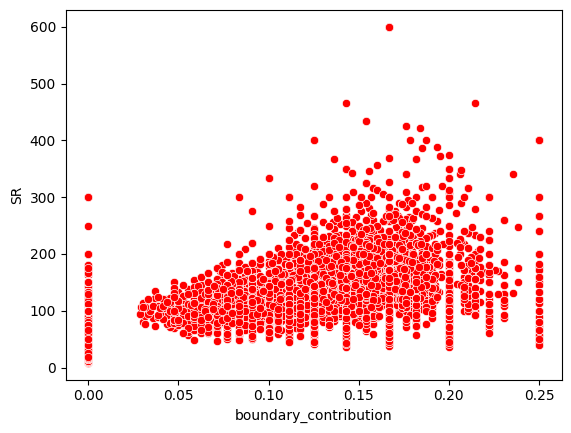

In [61]:
ax=sns.scatterplot(x='boundary_contribution',y='SR',data=batting,color='red') 

In [62]:
boundary_contribution=batting['boundary_contribution'].groupby(batting['batsmen']).sum()

In [63]:
boundary_contribution=boundary_contribution.reset_index()

In [65]:
boundary_contribution.sort_values(['boundary_contribution'],axis=0,ascending=False,inplace=True)

In [66]:
boundary_contribution.head(10)

,batsmen,boundary_contribution
424,SK Raina,20.137846
385,RV Uthappa,19.642338
393,S Dhawan,19.483546
487,V Kohli,18.559622
366,RG Sharma,18.349718
95,CH Gayle,17.690974
150,G Gambhir,16.656673
442,SR Watson,16.126717
218,KD Karthik,16.010834
330,PA Patel,15.604900


/var/folders/dz/g_qfrr755p93l5y4b9733dwh0000gq/T/ipykernel_6602/2705476707.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(boundary_contribution['batsmen'].head(10), rotation=90)


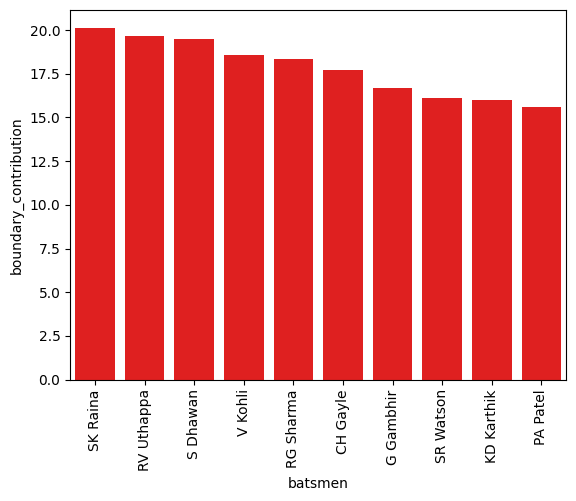

In [76]:
ax = sns.barplot(x=boundary_contribution['batsmen'].head(10), 
                 y=boundary_contribution['boundary_contribution'].head(10),
                color='red')

# Set x-axis labels
ax.set_xticklabels(boundary_contribution['batsmen'].head(10), rotation=90)

plt.show()